# Artifical Neural Network

- Yapay sinir ağı (ANN), insan beyninin çalışma şeklini taklit etmek için tasarlanmış bir yapay zeka modelidir. Bir yapay sinir ağı, birçok basit birimden oluşur ve her bir birim bir "nöron" olarak adlandırılır. Bu nöronlar, birbirleriyle bağlantılı katmanlarda düzenlenir.

Yapay sinir ağları, veri içindeki karmaşık ilişkileri öğrenmek için kullanılır. Örneğin, bir resimdeki bir nesneyi tanımak veya bir metni sınıflandırmak gibi görevlerde kullanılabilirler. Bir yapay sinir ağı, verileri girdi katmanından alır, ardından gizli katmanlardan geçirir ve son olarak çıktı katmanında bir sonuç üretir.

Yapay sinir ağlarının eğitimi, birçok örnekle yapılan tekrarlı bir süreçtir. Model, gerçek sonuçlarla karşılaştırılarak hatalarını azaltmak için ayarlanır. Bu süreçte, ağın ağırlıkları ve önyargıları gibi parametreleri güncellenir.

Yapay sinir ağlarının avantajlarından biri, karmaşık veri setlerinde iyi performans göstermeleridir. Ancak, büyük veri setleri ve karmaşık yapılar gerektirebilirler, bu da eğitim sürecinin zaman almasına neden olabilir.

Özetlemek gerekirse, yapay sinir ağları, insan beyninin işlevselliğinden ilham alarak karmaşık problemleri çözmek için kullanılan bir yapay zeka modelidir. Verileri işlerken ve öğrenirken, bu ağlar karmaşık ilişkileri öğrenir ve genellikle yüksek doğrulukla sonuçlar üretebilirler.

- Lojistik regresyon sınıflandırmada iyidir ancak karmaşıklık (doğrusal olmayanlık) arttıkça, modelin doğruluğu azalır.
- Bu nedenle, modelin karmaşıklığını artırmamız gerekiyor.
- Modelin karmaşıklığını artırmak için daha fazla doğrusal olmayan fonksiyonu gizli katmana eklememiz gerekiyor.
- Yapay sinir ağından beklediğimiz şey, karmaşıklık arttıkça daha fazla gizli katman kullanmak ve modelimizin daha iyi uyum sağlamasıdır. Sonuç olarak, doğruluk artar.
- **Yapay Sinir Ağı Adımları:**
    1. Kütüphaneleri İçe Aktarma
        - Size göstermek için tekrar içe aktarıyorum, ancak aslında bunları önceki bölümlerde içe aktardık.
    2. Veri Kümesini Hazırlama
        - Tamamen önceki bölümdekiyle aynıdır (lojistik regresyon).
        - Aynı veri kümesini kullandığımız için sadece train_loader ve test_loader'a ihtiyacımız var.
        - Aynı batch boyutunu, epoch ve iterasyon sayılarını kullanıyoruz.
    3. Yapay Sinir Ağı Modeli Oluşturma
        - 3 gizli katman ekliyoruz.
        - Çeşitlilik için ReLU, Tanh ve ELU aktivasyon fonksiyonlarını kullanıyoruz.
    4. Model Sınıfını Başlatma
        - input_dim = 28*28 # görüntünün piksel piksel boyutu
        - output_dim = 10  # etiketler 0,1,2,3,4,5,6,7,8,9
        - Gizli katman boyutu 150'dir. Sadece 150 olarak seçtim, bir nedeni yok. Aslında gizli katman boyutu hiperparametredir ve seçilmeli ve ayarlanmalıdır. Gizli katman boyutu için farklı değerler deneyebilir ve sonuçları gözlemleyebilirsiniz.
        - modeli oluşturma
    5. Kayıp Sınıfını Başlatma
        - Cross entropy kaybı
        - İçinde aynı zamanda softmax (lojistik fonksiyon) bulunmaktadır.
    6. Optimizasyon Algoritmasını Başlatma
        - SGD Optimizasyon Algoritması
    7. Modelin Eğitilmesi
    8. Tahmin
- Sonuç olarak, grafikten görebileceğiniz gibi, kayıp azalırken doğruluk artıyor ve modelimiz öğreniyor (eğitiliyor).
- Gizli katmanlara sayesinde model daha iyi öğrendi ve doğruluk (neredeyse %95) lojistik regresyon modelinin doğruluğundan daha iyidir.

### Kütüphanelerin import edilmesi

In [1]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Verisetinin yüklenmesi ve hazirlanmasi
Bu kısım Logistic regresyon kısmından alınmıştır açıklamalar için oraya bakabilirsiniz.

In [2]:
train = pd.read_csv(r"data/train.csv",dtype = np.float32)

targets_numpy = train.label.values
features_numpy = train.loc[:,train.columns != "label"].values/255 # normalization
 
features_train, features_test, targets_train, targets_test = train_test_split(features_numpy,
                                                                             targets_numpy,
                                                                             test_size = 0.2,
                                                                             random_state = 42) 

In [3]:
featuresTrain = torch.from_numpy(features_train)
targetsTrain = torch.from_numpy(targets_train).type(torch.LongTensor) # data type is long

featuresTest = torch.from_numpy(features_test)
targetsTest = torch.from_numpy(targets_test).type(torch.LongTensor) # data type is long

In [4]:
batch_size = 100
n_iters = 10000
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)

In [5]:
train = torch.utils.data.TensorDataset(featuresTrain,targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest,targetsTest)

train_loader = DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = DataLoader(test, batch_size = batch_size, shuffle = False)


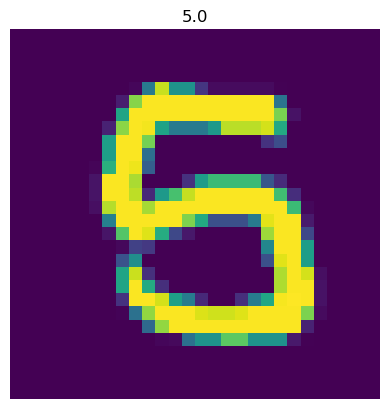

In [6]:
plt.imshow(features_numpy[51].reshape(28,28))
plt.axis("off")
plt.title(str(targets_numpy[51]))
plt.savefig('graph.png')
plt.show()

### Yapay sinir ağının oluşturulması

1. **Model Sınıfı Oluşturma (`class ANNModel(nn.Module)`):** Bu adımda, `ANNModel` adında bir sınıf tanımlanıyor. Bu sınıf, PyTorch'taki `nn.Module` sınıfından türetilmiştir, bu da PyTorch modeli için temel bir yapı sağlar.

2. **İnit Fonksiyonu (`def __init__(self, input_dim, hidden_dim, output_dim)`):** Bu fonksiyon, sınıfın yapıcı metodu olarak bilinir. Burada, yapay sinir ağının katmanlarını ve özelliklerini tanımlarız. Girdi boyutu (`input_dim`), gizli katman boyutu (`hidden_dim`) ve çıktı boyutu (`output_dim`) gibi parametreler alır.

3. **Katmanlar ve Aktivasyon Fonksiyonları Tanımlama:** Ağın katmanları ve bu katmanlarda kullanılacak aktivasyon fonksiyonları bu adımda tanımlanır. Örneğin, ilk katman olan `fc1`, giriş boyutunu (`input_dim`) ve gizli katman boyutunu (`hidden_dim`) alır. Ardından, bu katmanın ardından uygulanacak ReLU aktivasyon fonksiyonu (`relu1`) tanımlanır. Benzer şekilde, diğer katmanlar için de aynı işlem tekrarlanır.

4. **İleri Yayılım Fonksiyonu (`forward(self, x)`):** Bu fonksiyon, ağın girdi verilerini alıp çıktıları üreten işlevi içerir. İleri yayılım, verinin katmanlardan geçirilmesi ve son katmandan çıktıların üretilmesi sürecidir. Her katman için tanımlanan lineer (`fc`) ve aktivasyon (`ReLU`, `Tanh`, `ELU`) işlemleri bu adımda uygulanır.

Bu kod parçacığı, bir yapay sinir ağı modelinin PyTorch ile nasıl tanımlanacağını gösterir. Giriş verisi, katmanlar arasındaki işlemlerden geçirilir ve nihai olarak çıktı üretilir. Bu çıktı, modelin tahminlerini temsil eder.

In [7]:
class ANNModel(nn.Module):
    
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(ANNModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.tanh2 = nn.Tanh()
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        self.elu3 = nn.ELU()
        self.fc4 = nn.Linear(hidden_dim, output_dim)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        
        out = self.fc2(out)
        out = self.tanh2(out)
        
        out = self.fc3(out)
        out = self.elu3(out)
        
        out = self.fc4(out)
        return out

- `input_dim = 28*28`: Bu satır, giriş verisinin boyutunu belirler. Elimizdeki her bir görüntünün 28 piksel genişliğinde ve 28 piksel yüksekliğinde olduğunu gösterir. Bu, bir görüntüyü oluşturan piksellerin toplam sayısını ifade eder.

- `hidden_dim = 150`: Bu satır, gizli katmanın boyutunu belirler. Gizli katman, modelin içerisindeki "gizli" işlem katmanlarıdır ve görüntülerin özelliklerini öğrenmekten sorumludur. Burada belirtilen 150, bu gizli katmanın içerisinde bulunan nöron sayısını ifade eder. Daha büyük bir gizli katman, daha fazla öğrenme kapasitesine sahip olabilir, ancak aşırı öğrenme riski de artabilir.

- `output_dim = 10`: Bu satır, çıkışın boyutunu belirler. Elimizdeki veri setinde 10 farklı sınıf olduğunu düşünelim (örneğin, rakamlar 0'dan 9'a kadar). Bu durumda, çıkış boyutu 10 olacaktır. Yapay sinir ağı, giriş görüntüsünü analiz edip hangi sınıfa ait olduğunu belirleyecek ve bu 10 sınıf arasından birini çıkış olarak verecektir.

In [8]:
input_dim = 28*28
hidden_dim = 150
output_dim = 10

- `error = nn.CrossEntropyLoss()`: Bu satır, modelin eğitimi sırasında kullanılacak olan hata fonksiyonunu belirler. Hata fonksiyonu, modelin tahminlerinin gerçek etiketlerden ne kadar uzak olduğunu ölçer ve bu farkı minimize etmeye çalışır. `nn.CrossEntropyLoss()`, çok sınıflı sınıflandırma problemleri için yaygın olarak kullanılan bir hata fonksiyonudur. Bu hata fonksiyonu, modelin çıktıları ile gerçek etiketler arasındaki farkı ölçerek ve ardından bu farkı minimize ederek modelin doğruluğunu artırmaya çalışır.

Diğer yaygın hata fonksiyonları arasında şunlar bulunur:
- Mean Squared Error (MSE): Regresyon problemleri için kullanılır ve gerçek ve tahmini değerler arasındaki karelerin ortalamasını hesaplar.
- Binary Cross Entropy Loss: İkili sınıflandırma problemleri için kullanılır ve modelin çıktıları ile gerçek etiketler arasındaki farkı ölçer.
- Hinge Loss: Destek Vektör Makineleri (SVM) için kullanılır ve sınıflandırma sınırlarının optimize edilmesine yardımcı olur.

In [9]:
error = nn.CrossEntropyLoss()

In [10]:
model = ANNModel(input_dim, hidden_dim, output_dim)

- **Learning Rate (Öğrenme Oranı)**: Learning rate, modelin eğitimi sırasında her adımda parametrelerin ne kadar değiştirileceğini belirleyen bir hiperparametredir. Öğrenme oranı, modelin adım büyüklüğünü kontrol eder. Yani, model ne kadar büyük adımlarla güncellenirse, eğitim o kadar hızlı olur, ancak çok büyük adımlar doğrulukta dalgalanmalara veya aşırı uyuma yol açabilir. Aynı şekilde, çok küçük adımlar doğruluk artışını yavaşlatabilir veya modelin takılıp kalmasına neden olabilir. Dolayısıyla, uygun bir öğrenme oranı seçmek, modelin hızlı ve istikrarlı bir şekilde eğitilmesi için önemlidir.

- **Optimizer**: Optimizasyon algoritması, modelin eğitim sürecinde parametreleri güncellemek için kullanılır. PyTorch'ta, farklı optimizasyon algoritmalarını uygulamak için çeşitli optimizer sınıfları bulunur. Örneğin, SGD (Stochastic Gradient Descent), Adam, RMSprop gibi yaygın optimizasyon algoritmaları vardır. Her biri farklı şekillerde çalışır ve farklı türde veri veya problemler için daha iyi sonuçlar verebilir. Örneğin, SGD, büyük veri kümeleri veya yüksek boyutlu veri setleriyle iyi çalışabilirken, Adam, hızlı konverjans sağlamak için daha uygun olabilir. Optimize edici seçimi, modelin hızı, doğruluğu ve aşırı uyum gibi faktörleri etkileyebilir, bu nedenle uygun bir optimizasyon algoritması seçmek önemlidir.

In [11]:
learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [12]:
count = 0
loss_list = []
iteration_list = []
accuracy_list = []

1. **Epoch Döngüsü**: Her bir epoch (eğitim turu) boyunca modelin tüm eğitim verileri üzerinden geçmesini sağlar. `num_epochs` değişkeni, epoch sayısını belirler.

2. **Batch Döngüsü**: Her bir epoch içinde, eğitim verileri kümesini küçük parçalara, yani toplu işlere (batch) ayırır. Bu parçalar, ağın eğitimi sırasında kullanılır.

3. **Verileri Tensor'a Dönüştürme**: Eğitim verileri (görüntüler) ve etiketler (etiketler) tensor formatına dönüştürülür. `images` ve `labels` değişkenleri, her bir toplu işlemdeki veri ve etiketleri içerir.

4. **Gradyanları Temizleme**: Her toplu işlem başlamadan önce, önceki toplu işlemde hesaplanan gradyanları temizlemek için `optimizer.zero_grad()` yöntemi çağrılır.

5. **İleri Yayılım (Forward Propagation)**: Model, eğitim verilerini alır ve onları ileriye doğru geçirir. Bu, girdiyi modeldeki katmanlardan geçirerek çıktıları elde etmek anlamına gelir.

6. **Kayıp Hesaplama**: Çıktılar ve gerçek etiketler arasındaki farkı (kaybı) hesaplamak için belirlenen hata (kayıp) fonksiyonu kullanılır. Burada, Cross Entropy Loss fonksiyonu kullanılıyor.

7. **Gradyanları Hesaplama (Backward Propagation)**: Kaybın gradyanı, modelin parametrelerine göre hesaplanır. Bu, geriye doğru geçiş anlamına gelir. Gradyanlar, ağın ne kadar hızlı veya yavaş öğrenmesi gerektiğini belirler.

8. **Parametreleri Güncelleme**: Hesaplanan gradyanlar, optimizer tarafından kullanılarak modelin parametreleri güncellenir. Bu, modelin daha iyi sonuçlar üretmesi için parametrelerin ayarlanması anlamına gelir.

9. **Doğruluk Hesaplama**: Belirli aralıklarla doğruluk hesaplanır. Bu, modelin ne kadar iyi performans gösterdiğini anlamak için yapılır. Doğruluk, tahmin edilen sınıfların gerçek etiketlerle ne kadar uyumlu olduğunu gösterir.

10. **Sonuçları Kaydetme ve Ekrana Yazdırma**: Belirli aralıklarla, kaybedilen kayıpları, doğruluk ve iterasyon sayılarını kaydedilir ve ekrana yazdırılır. Bu, modelin eğitimi sırasında performansını izlemeye ve değerlendirmeye olanak tanır.

In [13]:
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        train = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
        
        optimizer.zero_grad()
        
        outputs = model(train)

        loss = error(outputs, labels)

        loss.backward()

        optimizer.step()
        
        count += 1
        
        if count % 50 == 0:   
            correct = 0
            total = 0
            for images, labels in test_loader:

                test = Variable(images.view(-1, 28*28))

                outputs = model(test)

                predicted = torch.max(outputs.data, 1)[1]

                total += len(labels)

                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / float(total)

            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
        if count % 500 == 0:
            print(f'Iteration: {count}  Loss: {loss.data}  Accuracy: {accuracy} %')

Iteration: 500  Loss: 0.7682890892028809  Accuracy: 79.86904907226562 %
Iteration: 1000  Loss: 0.4334113597869873  Accuracy: 87.85713958740234 %
Iteration: 1500  Loss: 0.24112853407859802  Accuracy: 89.39286041259766 %
Iteration: 2000  Loss: 0.30839866399765015  Accuracy: 90.23809814453125 %
Iteration: 2500  Loss: 0.3390277624130249  Accuracy: 91.60713958740234 %
Iteration: 3000  Loss: 0.11357386410236359  Accuracy: 92.3452377319336 %
Iteration: 3500  Loss: 0.24637115001678467  Accuracy: 93.20237731933594 %
Iteration: 4000  Loss: 0.06882078945636749  Accuracy: 93.76190185546875 %
Iteration: 4500  Loss: 0.3092249631881714  Accuracy: 94.44047546386719 %
Iteration: 5000  Loss: 0.11099345982074738  Accuracy: 94.66666412353516 %
Iteration: 5500  Loss: 0.19178463518619537  Accuracy: 94.92857360839844 %
Iteration: 6000  Loss: 0.18089622259140015  Accuracy: 95.03571319580078 %
Iteration: 6500  Loss: 0.08679400384426117  Accuracy: 95.52381134033203 %
Iteration: 7000  Loss: 0.11991824209690094  

### Grafik çizdirilmesi

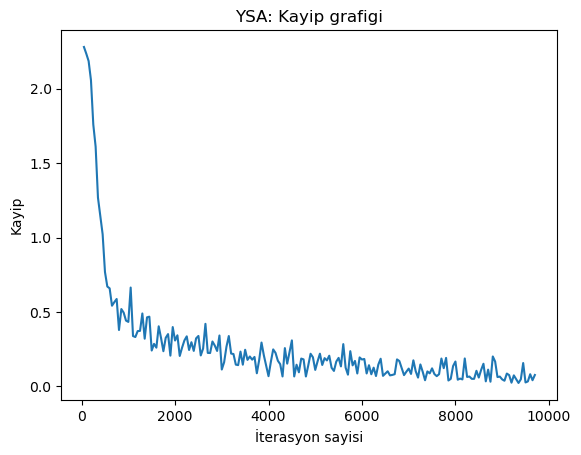

In [14]:
plt.plot(iteration_list,loss_list)
plt.xlabel("İterasyon sayisi")
plt.ylabel("Kayip")
plt.title("YSA: Kayip grafigi")
plt.show()

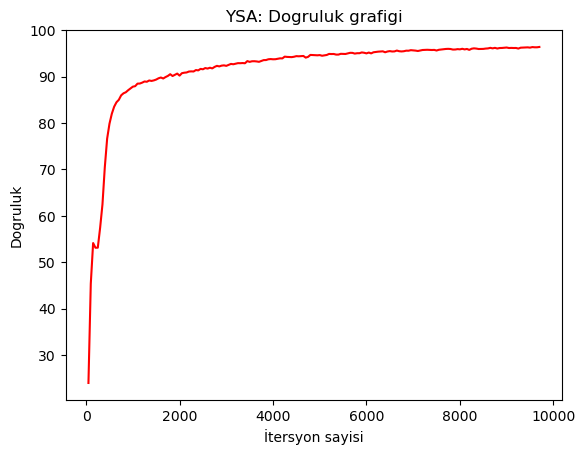

In [15]:
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("İtersyon sayisi")
plt.ylabel("Dogruluk")
plt.title("YSA: Dogruluk grafigi")
plt.show()

### Dışardaki bir görüntüden Sınıf tahmini

In [16]:

from PIL import Image
import torchvision.transforms as transforms
import torch.nn.functional as F

image_path = "img/2.jpg"
image = Image.open(image_path)

preprocess = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.Grayscale(),  # Resmi siyah beyaza dönüştürme
    transforms.ToTensor(),   # Görüntüyü tensöre dönüştürme ve normalizasyon
])
image = preprocess(image)

image = image.view(-1, 28*28)

# Görüntüyü modele verme
output = model(image)

# Tahminleri almak için softmax kullanma
probabilities = F.softmax(output, dim=1)

# En yüksek olasılığa sahip sınıfı belirleme
predicted_class = torch.argmax(probabilities)

print("Tahmin edilen sınıf:", predicted_class.item())


Tahmin edilen sınıf: 3


In [17]:
probabilities

tensor([[6.0357e-05, 3.0096e-08, 8.7646e-05, 9.4433e-01, 1.4050e-10, 7.4724e-03,
         1.0627e-08, 1.5915e-07, 4.8047e-02, 5.8549e-06]],
       grad_fn=<SoftmaxBackward0>)

In [ ]:
import cv2
cap = cv2.VideoCapture(0)

In [ ]:
preprocess = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((28, 28)),
    transforms.Grayscale(),
    transforms.ToTensor(),
])

In [ ]:
while True:
    ret, frame = cap.read()

    input_image = preprocess(frame).view(-1, 28*28)
    
    with torch.no_grad():
        output = model(input_image)
        probabilities = torch.softmax(output, dim=1)
        predicted_class = torch.argmax(probabilities)

    cv2.putText(frame, str(predicted_class.item()), (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    cv2.imshow('Real-time Prediction', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()